In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
df = pd.read_csv(r"C:\Users\karat\OneDrive\Documents\machine learning\datasets\example_wp_log_peyton_manning.csv")

In [4]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
print(df['ds'][0], list(df['ds'])[-1])

2007-12-10 2016-01-20


In [6]:
m = Prophet()
m.fit(df)

13:07:34 - cmdstanpy - INFO - Chain [1] start processing
13:07:35 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
future['ds'].shape[0] - df['ds'].shape[0]

365

In [9]:
forecast = m.predict(future)

In [10]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.188899,7.528738,8.957533,6.838124,7.534919,1.018065,1.018065,1.018065,0.048297,0.048297,0.048297,0.969768,0.969768,0.969768,0.0,0.0,0.0,8.206964
3266,2017-01-16,7.187874,7.807382,9.253076,6.836318,7.535597,1.344085,1.344085,1.344085,0.352285,0.352285,0.352285,0.991800,0.991800,0.991800,0.0,0.0,0.0,8.531958
3267,2017-01-17,7.186848,7.565646,9.036963,6.833781,7.536093,1.132527,1.132527,1.132527,0.119640,0.119640,0.119640,1.012887,1.012887,1.012887,0.0,0.0,0.0,8.319376
3268,2017-01-18,7.185823,7.396588,8.891086,6.830926,7.536902,0.966167,0.966167,0.966167,-0.066661,-0.066661,-0.066661,1.032828,1.032828,1.032828,0.0,0.0,0.0,8.151991
3269,2017-01-19,7.184798,7.458549,8.902239,6.828071,7.537362,0.979109,0.979109,0.979109,-0.072268,-0.072268,-0.072268,1.051377,1.051377,1.051377,0.0,0.0,0.0,8.163908


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.528738,8.957533
3266,2017-01-16,8.531958,7.807382,9.253076
3267,2017-01-17,8.319376,7.565646,9.036963
3268,2017-01-18,8.151991,7.396588,8.891086
3269,2017-01-19,8.163908,7.458549,8.902239


c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


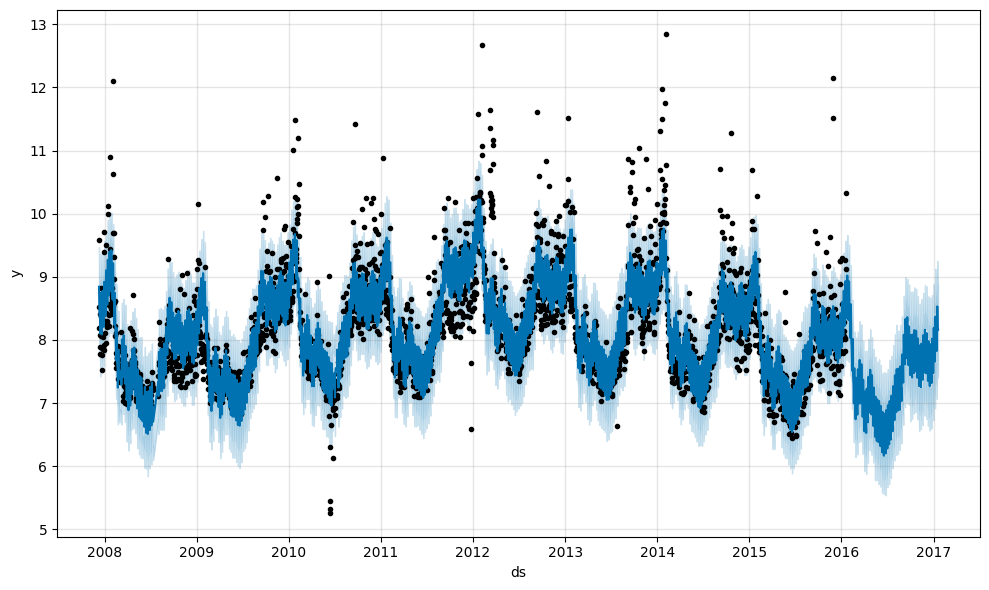

In [12]:
fig1 = m.plot(forecast)

c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

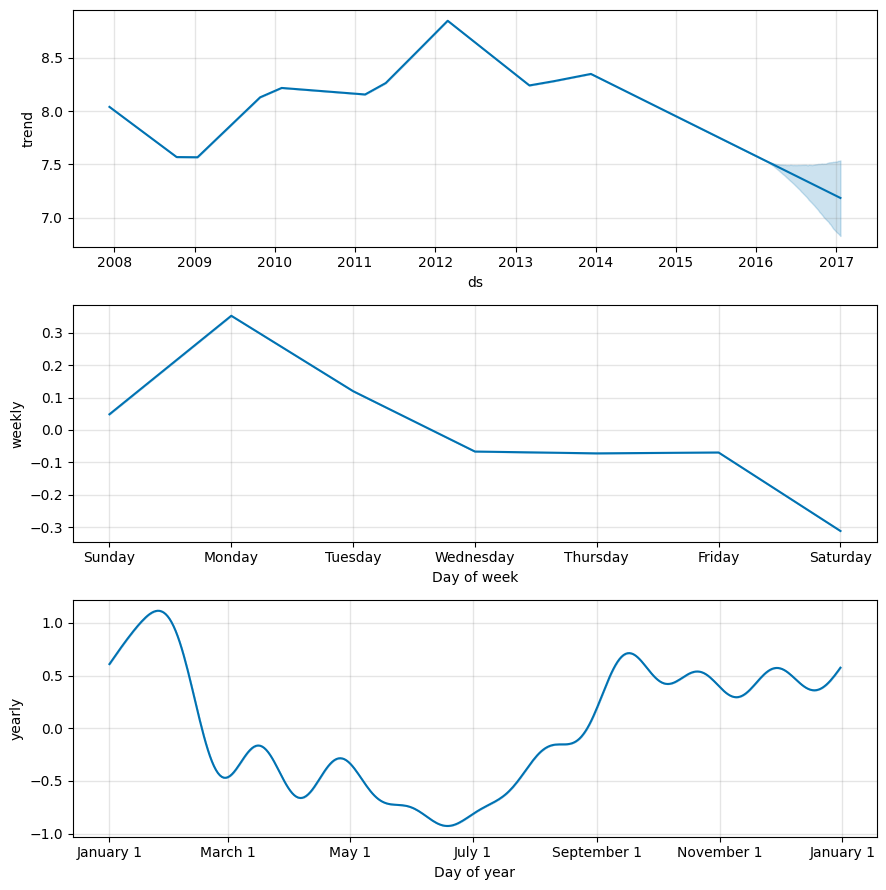

In [13]:
fig2 = m.plot_components(forecast)

Adding Saturation caps

In [14]:
print(max(df['y']))
min(df['y'])

12.846746888829


5.26269018890489

In [15]:
df['cap'] = 13
df['floor'] = 6

In [16]:
m2 = Prophet(growth='logistic')
m2.fit(df)

13:07:39 - cmdstanpy - INFO - Chain [1] start processing
13:07:40 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


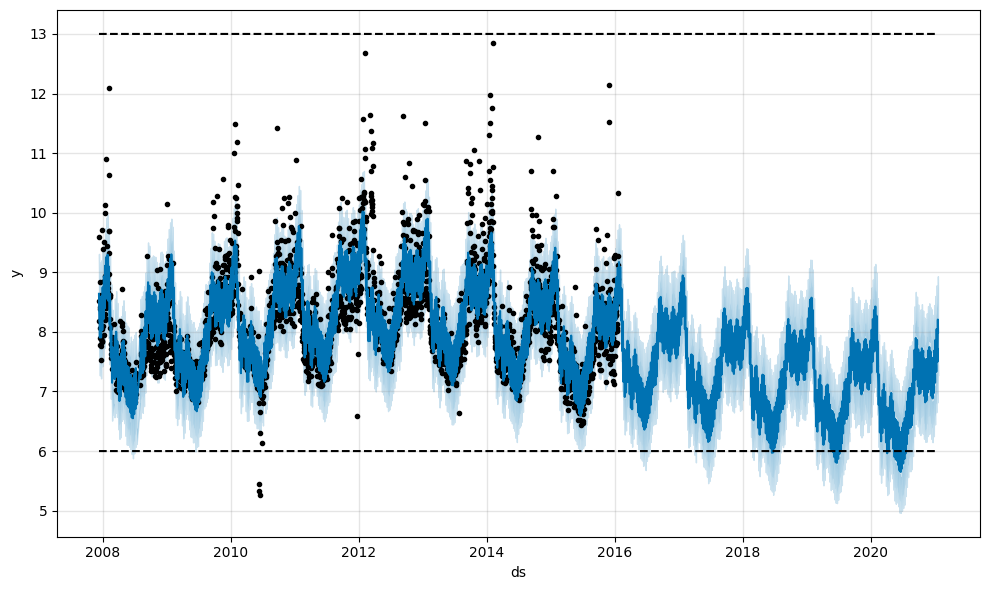

In [17]:
future = m2.make_future_dataframe(periods=1826)
future['cap'] = 13
future['floor'] = 6
fcst = m2.predict(future)
fig = m2.plot(fcst)

Fine-tuning Changepoints

In [18]:
df = pd.read_csv(r"C:\Users\karat\OneDrive\Documents\machine learning\datasets\example_wp_log_peyton_manning.csv")

In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)

c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


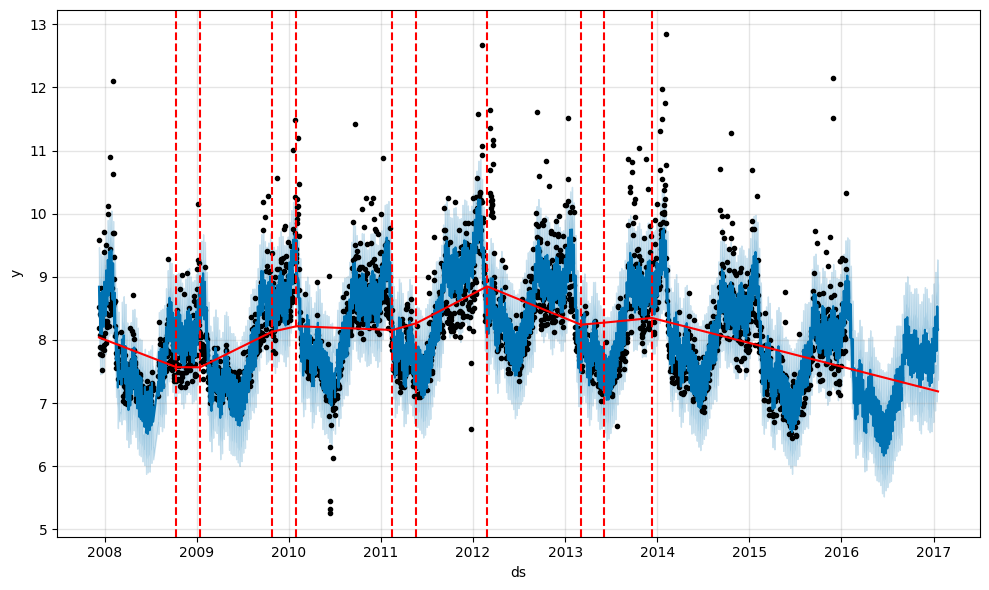

In [20]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


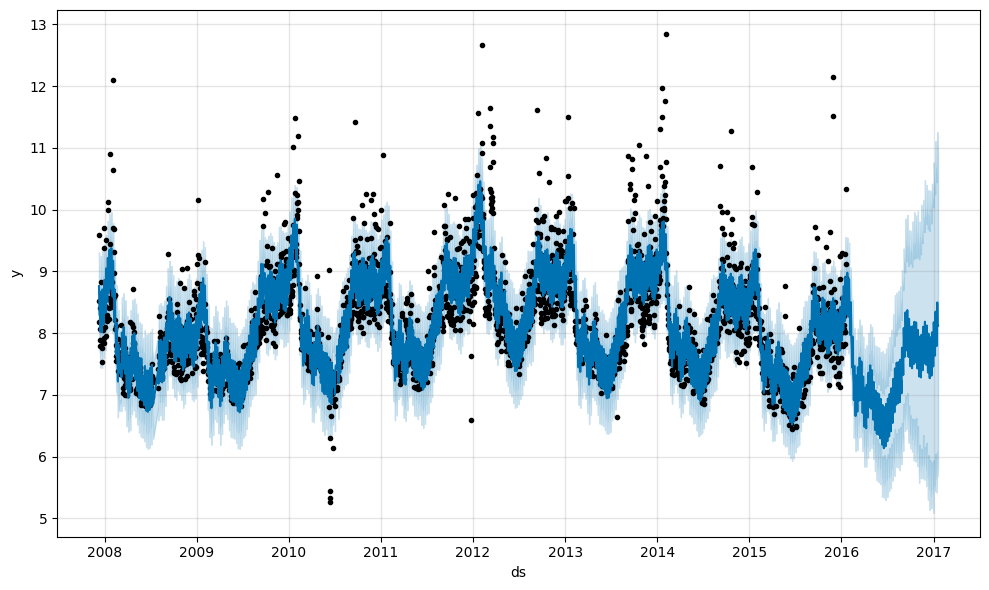

In [21]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

13:08:08 - cmdstanpy - INFO - Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


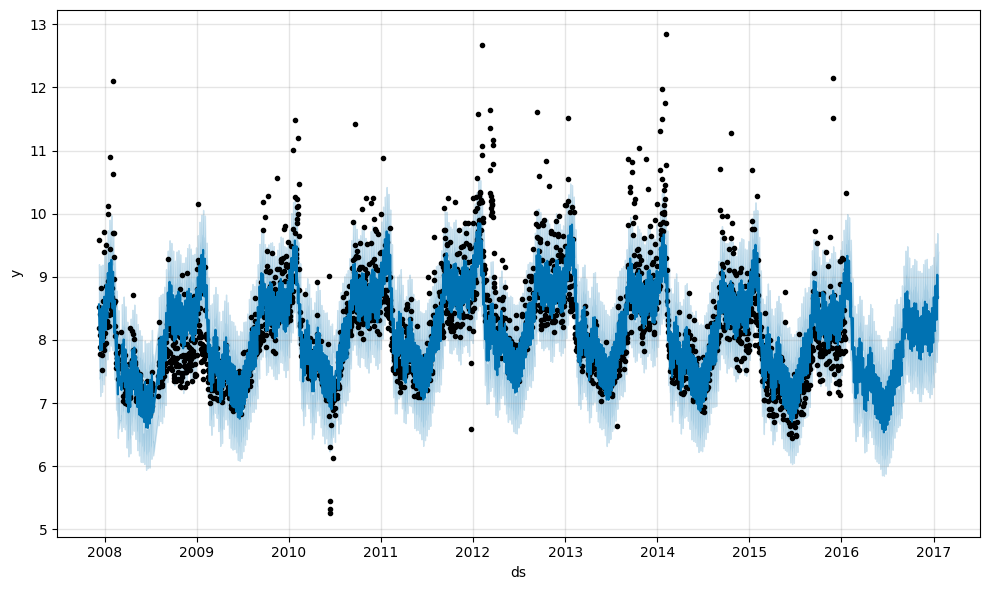

In [22]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Holidays

In [23]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [24]:
print(playoffs.head(),superbowls.head(),sep='\n\n')

   holiday         ds  lower_window  upper_window
0  playoff 2008-01-13             0             1
1  playoff 2009-01-03             0             1
2  playoff 2010-01-16             0             1
3  playoff 2010-01-24             0             1
4  playoff 2010-02-07             0             1

     holiday         ds  lower_window  upper_window
0  superbowl 2010-02-07             0             1
1  superbowl 2014-02-02             0             1
2  superbowl 2016-02-07             0             1


In [25]:
holidays.reset_index(drop=True, inplace=True)
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [26]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

13:08:11 - cmdstanpy - INFO - Chain [1] start processing
13:08:12 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.228031,1.201321
2191,2014-02-03,1.901884,1.451541
2532,2015-01-11,1.228031,0.000000
2533,2015-01-12,1.901884,0.000000
2901,2016-01-17,1.228031,0.000000
2902,2016-01-18,1.901884,0.000000
2908,2016-01-24,1.228031,0.000000
2909,2016-01-25,1.901884,0.000000
2922,2016-02-07,1.228031,1.201321
2923,2016-02-08,1.901884,1.451541


c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

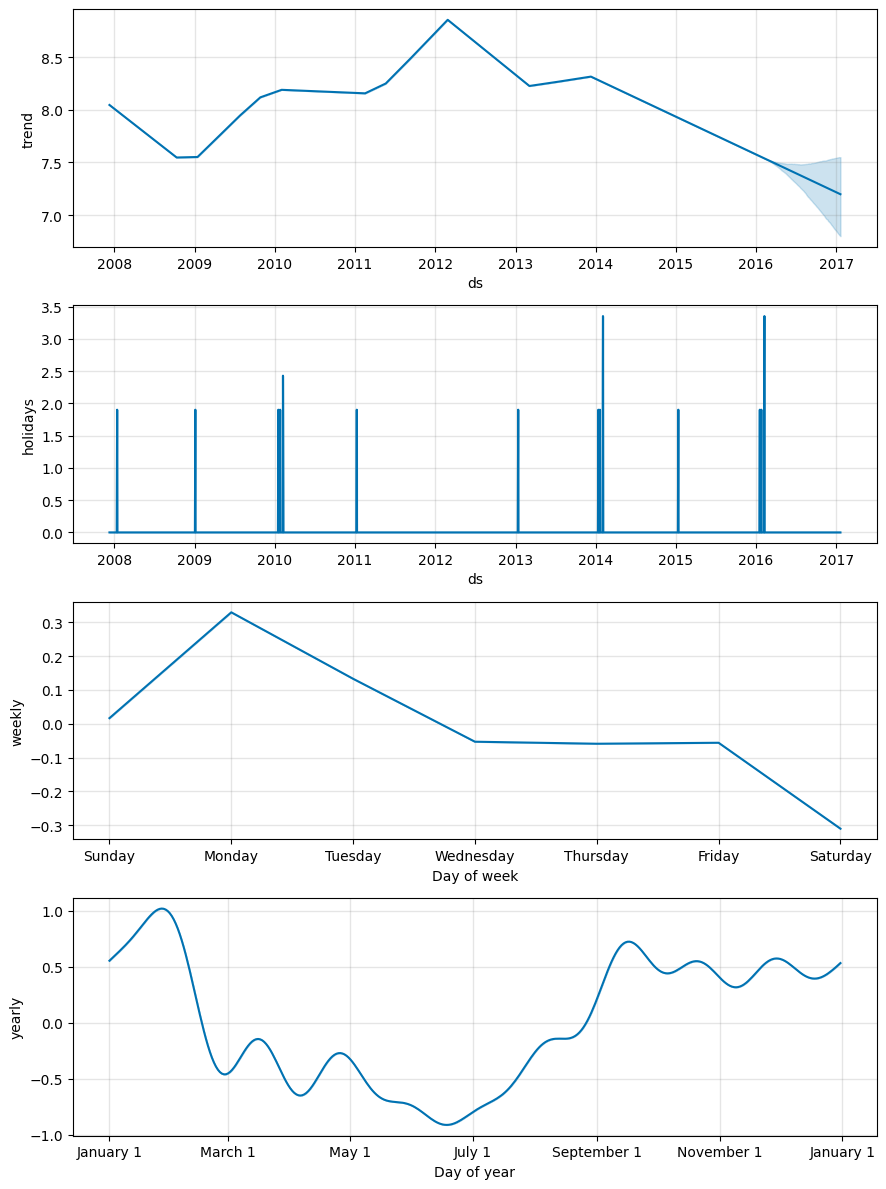

In [28]:
fig = m.plot_components(forecast)

In [29]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

13:08:16 - cmdstanpy - INFO - Chain [1] start processing
13:08:16 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12                   Columbus Day
13        Veterans Day (observed)
14    Independence Day (observed)
15      New Year's Day (observed)
dtype: object

c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

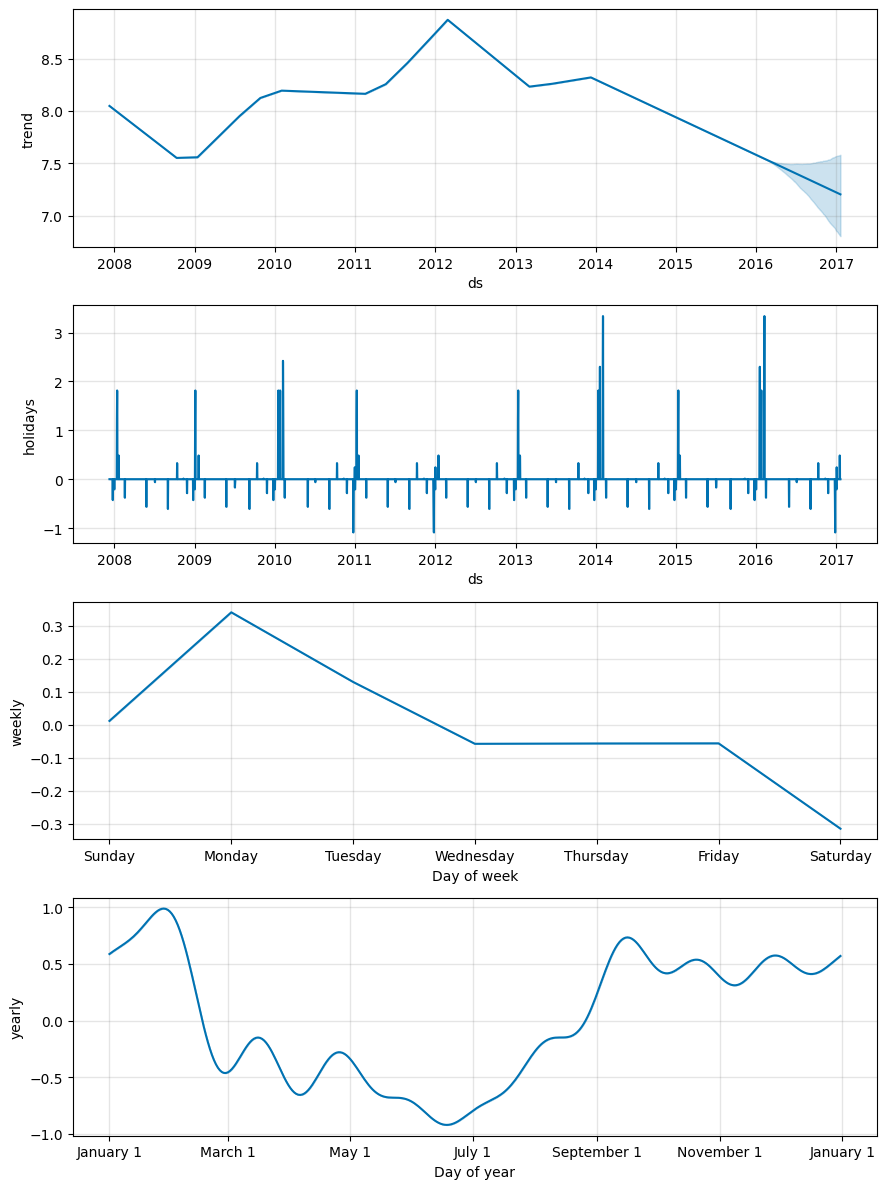

In [31]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

Seasonality

13:08:20 - cmdstanpy - INFO - Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


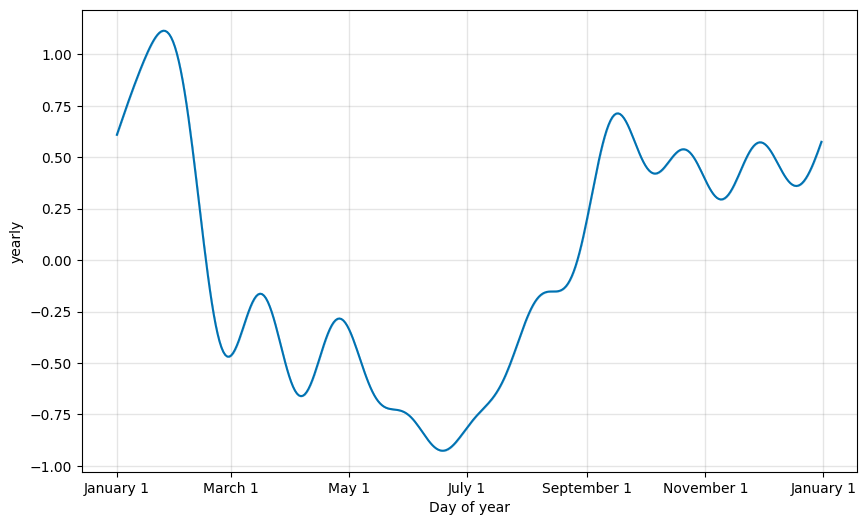

In [32]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

13:08:22 - cmdstanpy - INFO - Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


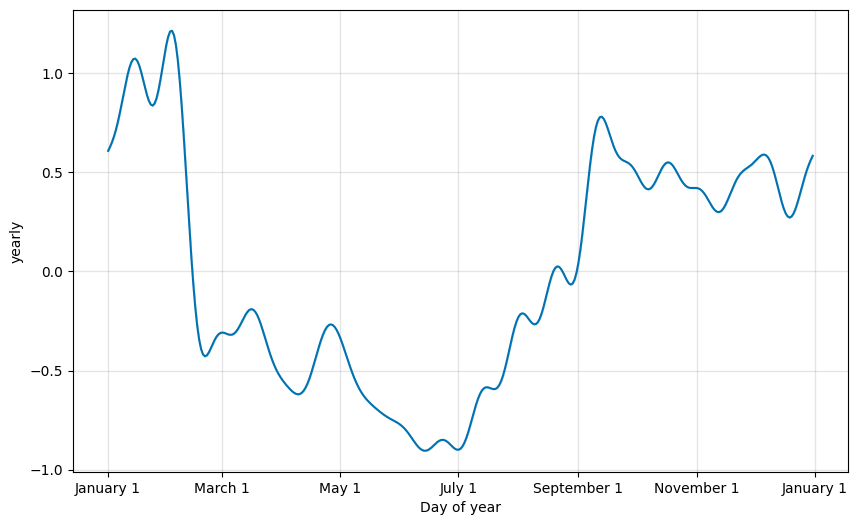

In [33]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

13:08:24 - cmdstanpy - INFO - Chain [1] start processing
13:08:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

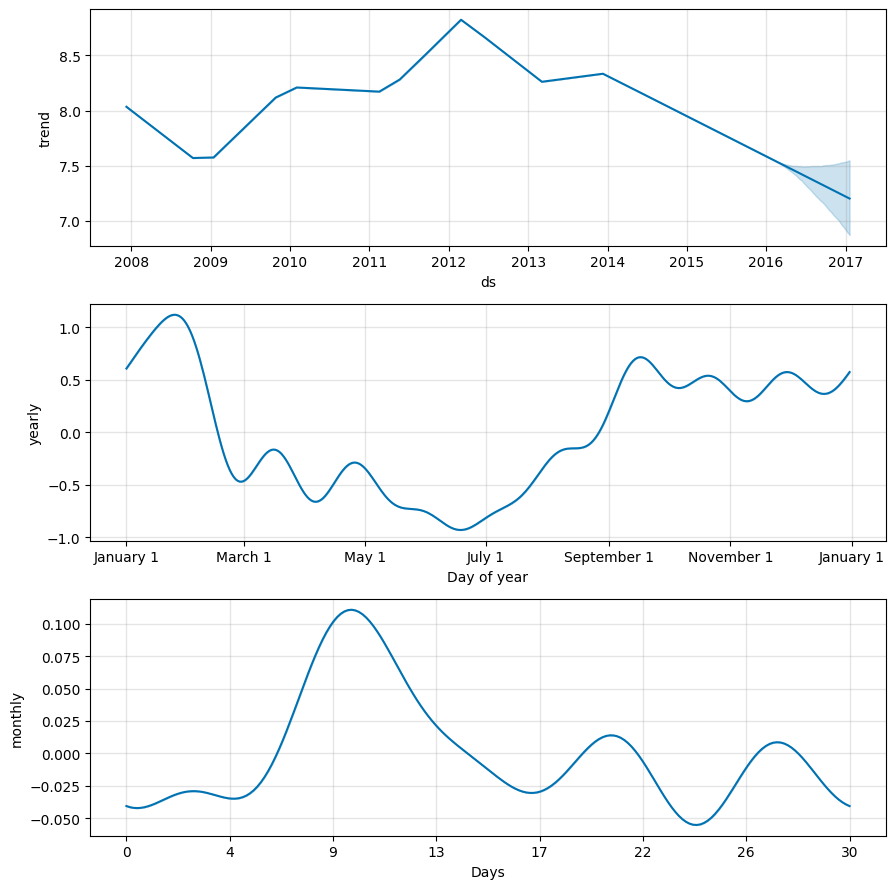

In [34]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

13:08:27 - cmdstanpy - INFO - Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

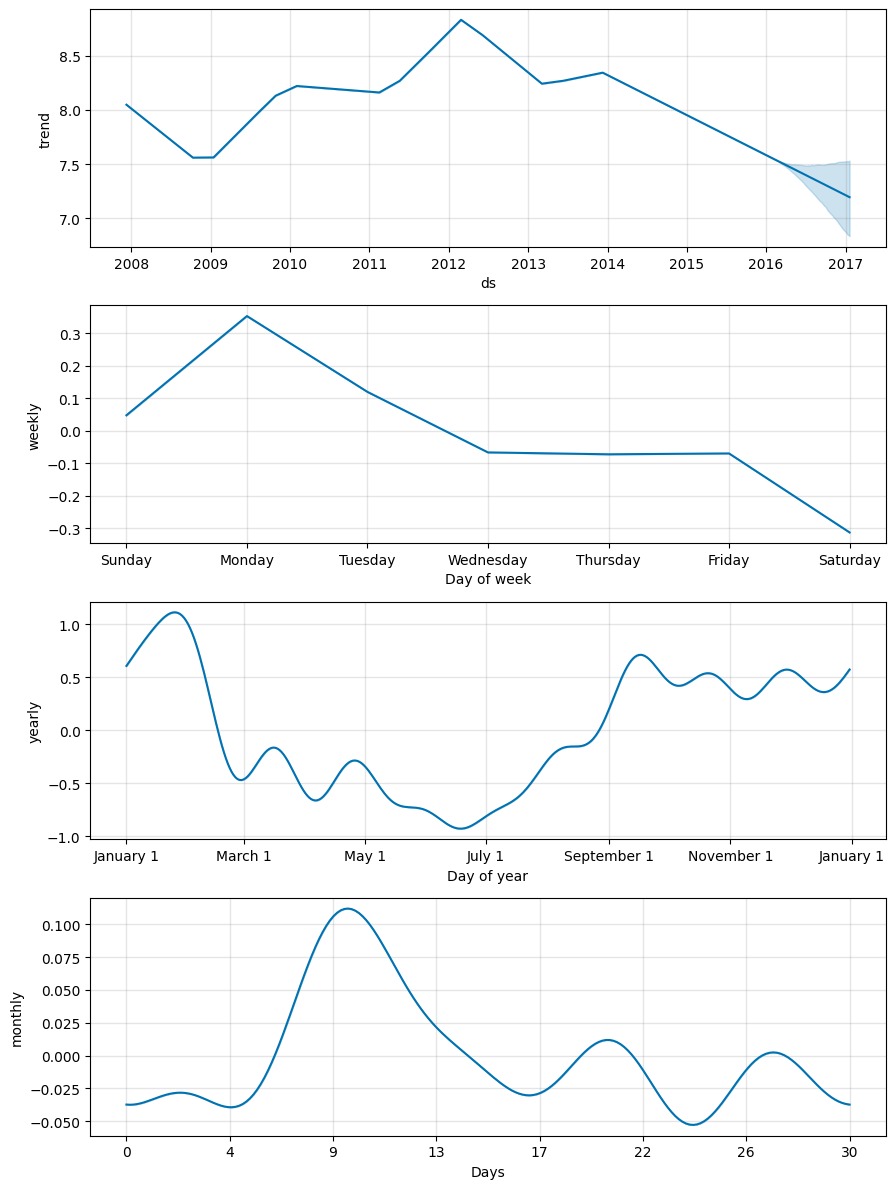

In [35]:
m = Prophet(weekly_seasonality=3)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

13:08:31 - cmdstanpy - INFO - Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

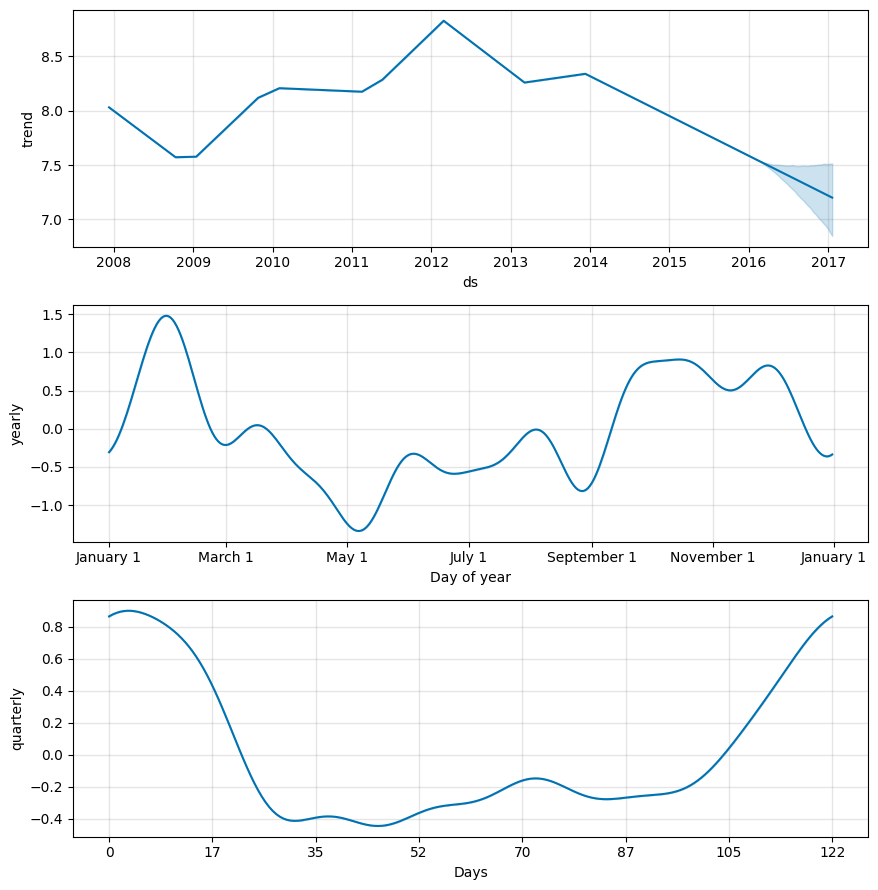

In [36]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='quarterly', period=122, fourier_order=7)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [37]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

In [38]:
df.head()

,ds,y,on_season,off_season
0,2007-12-10,9.590761,True,False
1,2007-12-11,8.519590,True,False
2,2007-12-12,8.183677,True,False
3,2007-12-13,8.072467,True,False
4,2007-12-14,7.893572,True,False


13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

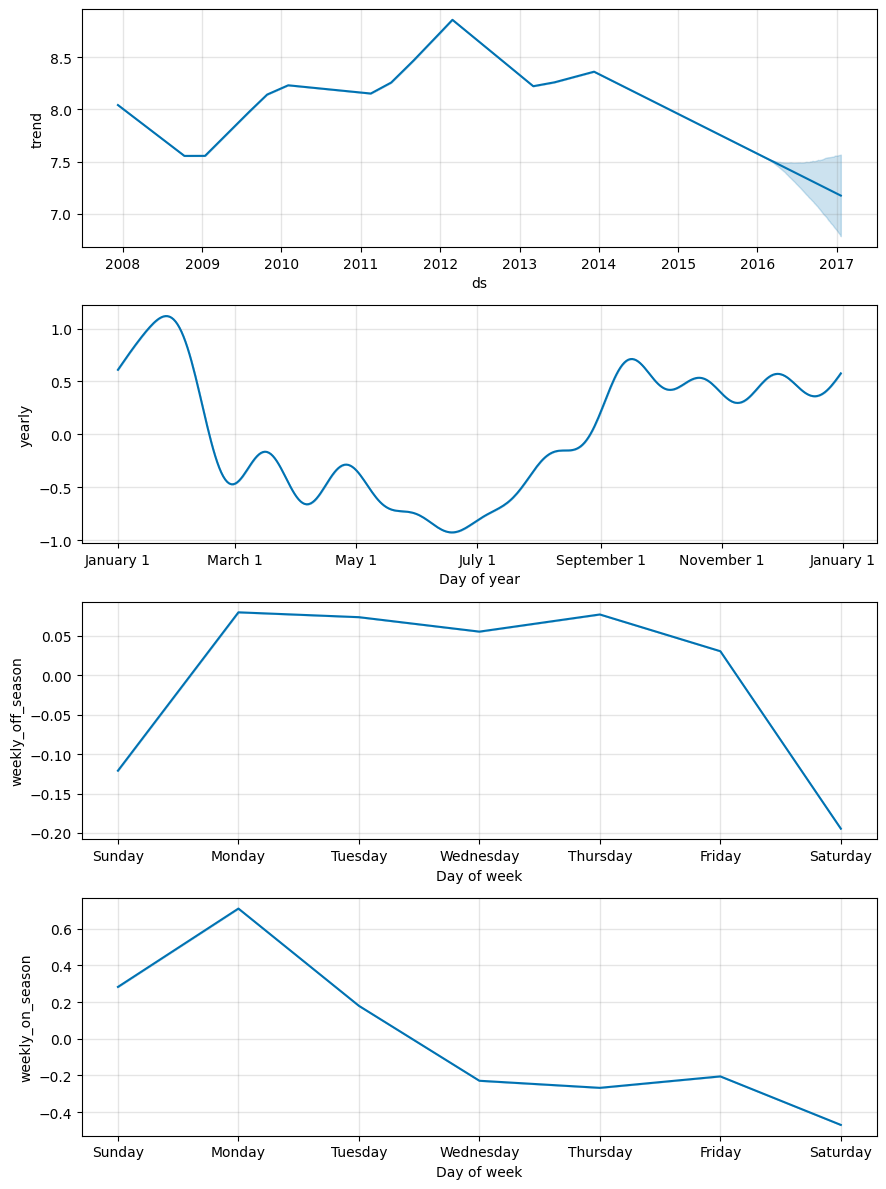

In [39]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

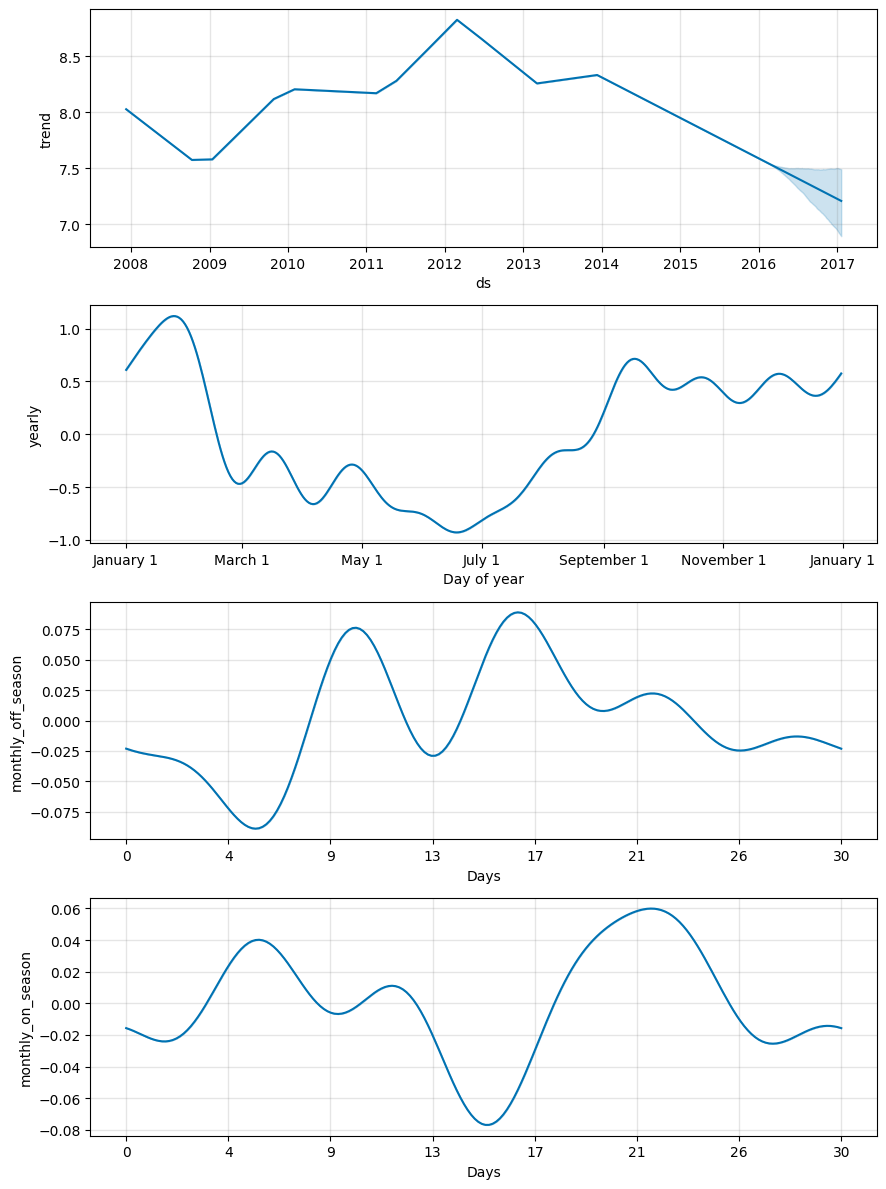

In [40]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly_on_season', period=30, fourier_order=5, condition_name='on_season')
m.add_seasonality(name='monthly_off_season', period=30, fourier_order=5, condition_name='off_season')

# future['on_season'] = future['ds'].apply(is_nfl_season)
# future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

Additional Regressors

13:31:41 - cmdstanpy - INFO - Chain [1] start processing
13:31:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

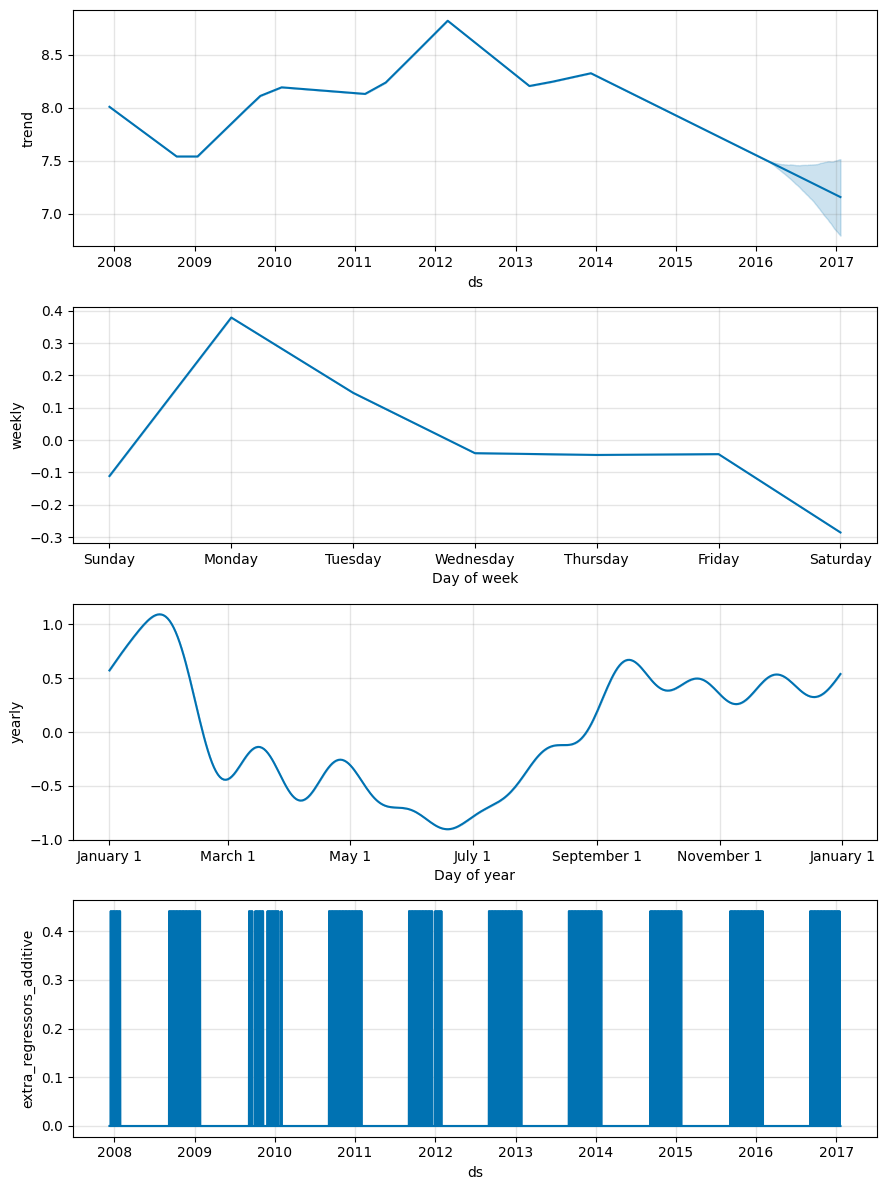

In [41]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

Multiplicative Seasonality

In [42]:
df2 = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df2.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


14:32:48 - cmdstanpy - INFO - Chain [1] start processing
14:32:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


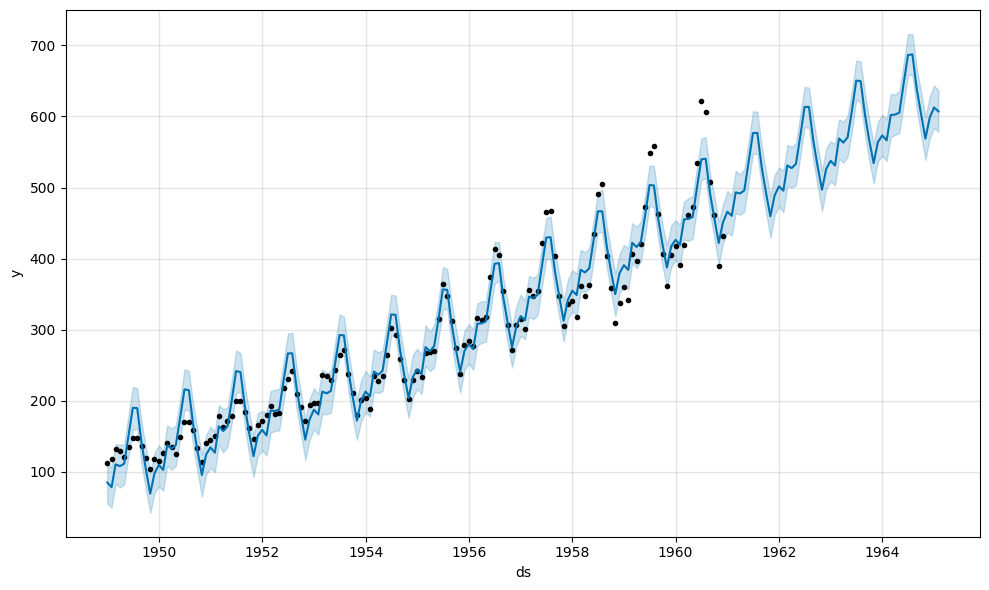

In [43]:
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

14:33:13 - cmdstanpy - INFO - Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


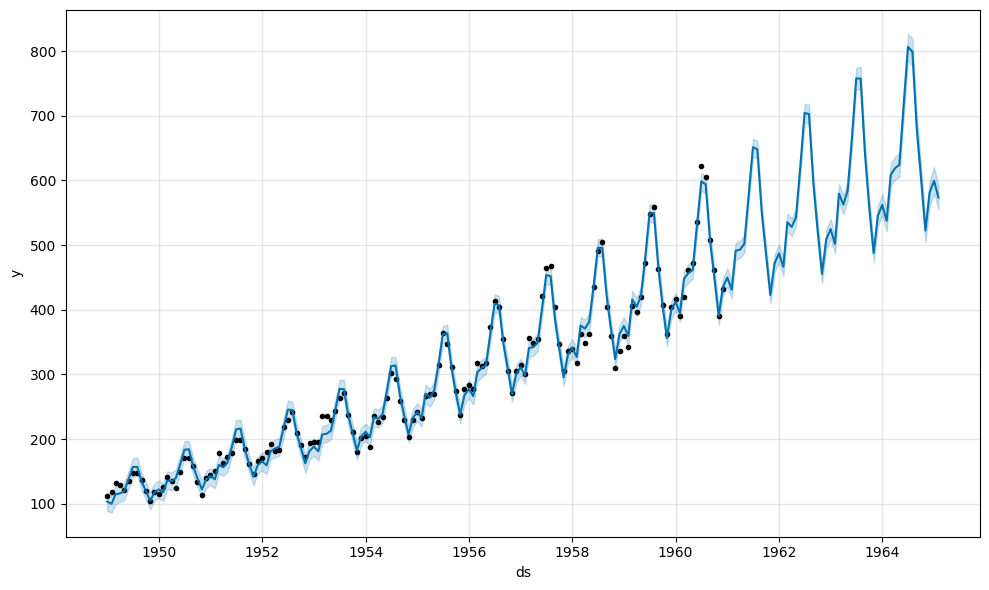

In [45]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df2)
forecast = m.predict(future)
fig = m.plot(forecast)

Uncertainity

In [46]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df, show_progress=False).predict(future)

15:00:31 - cmdstanpy - INFO - CmdStan start processing
15:00:31 - cmdstanpy - INFO - Chain [1] start processing
15:00:31 - cmdstanpy - INFO - Chain [2] start processing
15:00:31 - cmdstanpy - INFO - Chain [3] start processing
15:00:31 - cmdstanpy - INFO - Chain [4] start processing
15:13:03 - cmdstanpy - INFO - Chain [2] done processing
15:13:14 - cmdstanpy - INFO - Chain [4] done processing
15:13:22 - cmdstanpy - INFO - Chain [1] done processing
15:13:29 - cmdstanpy - INFO - Chain [3] done processing
15:13:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, 

c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

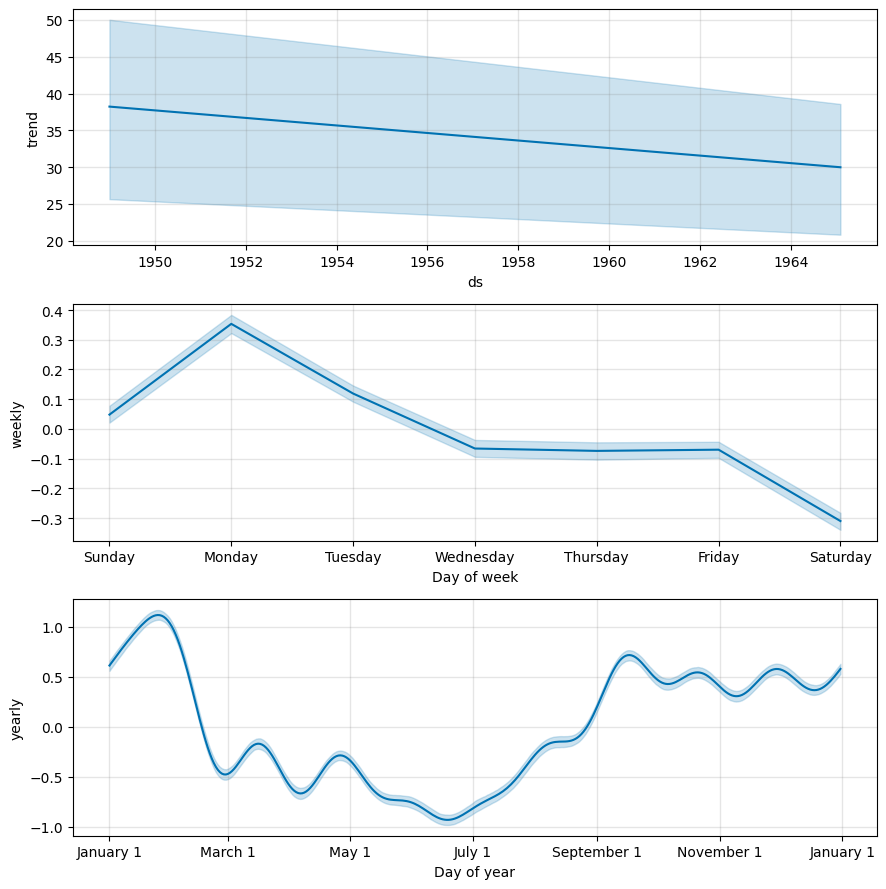

In [47]:
fig = m.plot_components(forecast)

Cross-validation

In [48]:
df = pd.read_csv(r"C:\Users\karat\OneDrive\Documents\machine learning\datasets\example_wp_log_peyton_manning.csv")

In [49]:
m = Prophet()
m.fit(df)

19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [51]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

19:38:45 - cmdstanpy - INFO - Chain [1] start processing
19:38:46 - cmdstanpy - INFO - Chain [1] done processing
19:38:47 - cmdstanpy - INFO - Chain [1] start processing
19:38:47 - cmdstanpy - INFO - Chain [1] done processing
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
19:38:51 - cmdstanpy - INFO - Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1] done processing
19:38:56 - cmdstanpy - INFO - Chain [1] start processing
19:38:57 - cmdstanpy - INFO - Chain [1] done processing
19:38:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1]

In [52]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.953435,8.439297,9.447086,8.242493,2010-02-15
1,2010-02-17,8.719763,8.231927,9.229432,8.008033,2010-02-15
2,2010-02-18,8.603390,8.147048,9.106751,8.045268,2010-02-15
3,2010-02-19,8.525158,7.994877,9.024319,7.928766,2010-02-15
4,2010-02-20,8.266980,7.785730,8.742759,7.745003,2010-02-15


In [53]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.492508,0.701789,0.503905,0.058375,0.049842,0.058677,0.679077
1,38 days,0.498292,0.705898,0.508875,0.058950,0.049569,0.059311,0.679077
2,39 days,0.520423,0.721404,0.514952,0.059547,0.049609,0.060034,0.678849
3,40 days,0.527610,0.726368,0.517812,0.059852,0.049504,0.060408,0.681361
4,41 days,0.534954,0.731406,0.518778,0.059928,0.049569,0.060547,0.688899


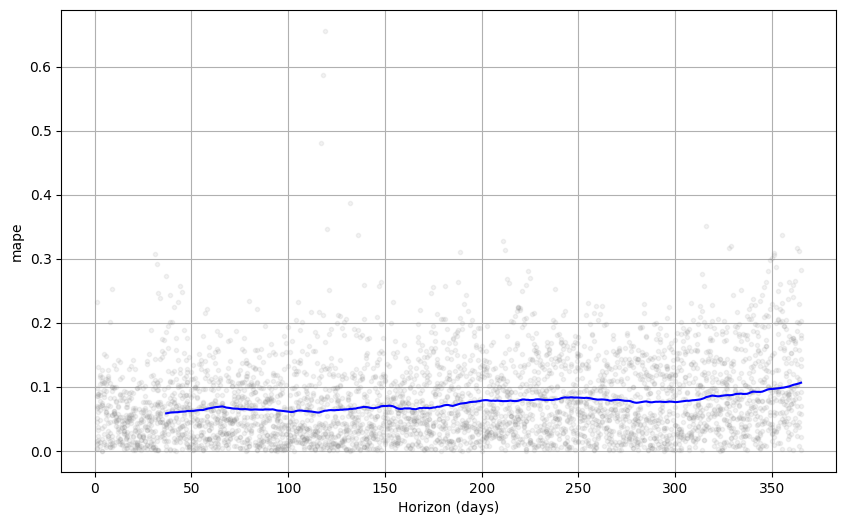

In [54]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [56]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

20:22:35 - cmdstanpy - INFO - Chain [1] start processing
20:22:36 - cmdstanpy - INFO - Chain [1] done processing
20:22:44 - cmdstanpy - INFO - Chain [1] start processing
20:22:44 - cmdstanpy - INFO - Chain [1] done processing
20:22:52 - cmdstanpy - INFO - Chain [1] start processing
20:22:52 - cmdstanpy - INFO - Chain [1] done processing
20:23:02 - cmdstanpy - INFO - Chain [1] start processing
20:23:03 - cmdstanpy - INFO - Chain [1] done processing
20:23:12 - cmdstanpy - INFO - Chain [1] start processing
20:23:12 - cmdstanpy - INFO - Chain [1] done processing
20:23:23 - cmdstanpy - INFO - Chain [1] start processing
20:23:24 - cmdstanpy - INFO - Chain [1] done processing
20:23:30 - cmdstanpy - INFO - Chain [1] start processing
20:23:31 - cmdstanpy - INFO - Chain [1] done processing
20:23:37 - cmdstanpy - INFO - Chain [1] start processing
20:23:38 - cmdstanpy - INFO - Chain [1] done processing
20:23:44 - cmdstanpy - INFO - Chain [1] start processing
20:23:46 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.748767
1                     0.001                     0.10  0.750933
2                     0.001                     1.00  0.753178
3                     0.001                    10.00  0.761624
4                     0.010                     0.01  0.528696
5                     0.010                     0.10  0.539383
6                     0.010                     1.00  0.522266
7                     0.010                    10.00  0.540539
8                     0.100                     0.01  0.519954
9                     0.100                     0.10  0.519691
10                    0.100                     1.00  0.518836
11                    0.100                    10.00  0.520175
12                    0.500                     0.01  0.532142
13                    0.500                     0.10  0.524283
14                    0.500                     1.00  0

In [57]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}


In [59]:
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params

[{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.5, 'seasonal

In [65]:
print(*param_grid.values())

[0.001, 0.01, 0.1, 0.5] [0.01, 0.1, 1.0, 10.0]
